In [1]:
# Import all the necessary libraries and call out the input file as a loan Dataset

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
loan = pd.read_csv("C:/Users/kapil/OneDrive/Kapil/Study/Upgrad/Python/Lending Club Case Study/loan/loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
loan.shape

(39717, 111)

In [3]:
loan.info()
loan.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [4]:
# Check how many all rows have missing values
loan.isnull().all(axis=1).sum()

0

In [5]:
# Check how many all columns have missing values
loan.isnull().all(axis=0).sum()

54

In [6]:
# Check for duplicate rows in dataset based on id column
loan.duplicated(subset=None, keep='first').count()
dup=loan[loan.duplicated(['id'])]
dup

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [7]:
# Find columns with null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Drop columns where all values are null.
loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1)
loan.shape

(39717, 59)

In [9]:
# Drop additional columns we don't need these as these are mostly nulls.

columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan.drop(labels = columns_drop_list1, axis =1, inplace=True)
loan.shape

(39717, 54)

In [10]:
columns_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan.drop(labels = columns_drop_list2, axis =1, inplace=True)
loan.shape

(39717, 50)

In [11]:
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
loan.drop(labels = columns_drop_list3, axis =1, inplace=True)
loan.shape

(39717, 45)

In [12]:
loan.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status 

In [13]:
# Employment length column to have only numbers.

loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0


In [14]:
# Clean on column pub_rec_bankruptcies
loan.pub_rec_bankruptcies.isnull().sum()
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
loan.pub_rec_bankruptcies.isnull().sum()

0

In [15]:
# Remove % symbol from intrest rate & revol util column

loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [16]:
# check removal of % symbol from int_rate and revol_util

print(loan.int_rate.head())
print(loan.revol_util.head())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object
0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object


In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [18]:
# convert amount columns into numeric data

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

In [19]:
# Filter on column loan status
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Loan Application Count')

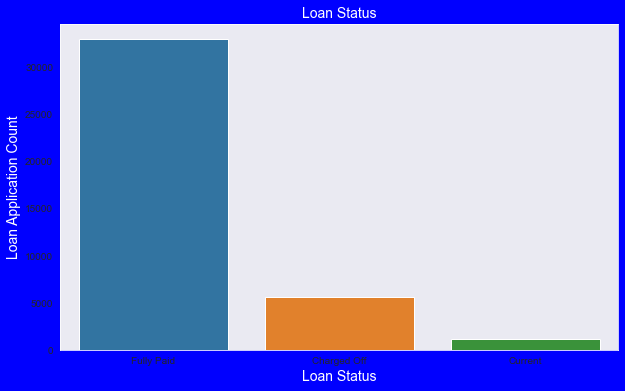

In [21]:
# Map Plot for the Loan Status
plt.figure(figsize=(10,6),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan)
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w') 

In [22]:
# Find % of each option in loan status

(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [23]:
# Filter on column loan purpose

loan.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

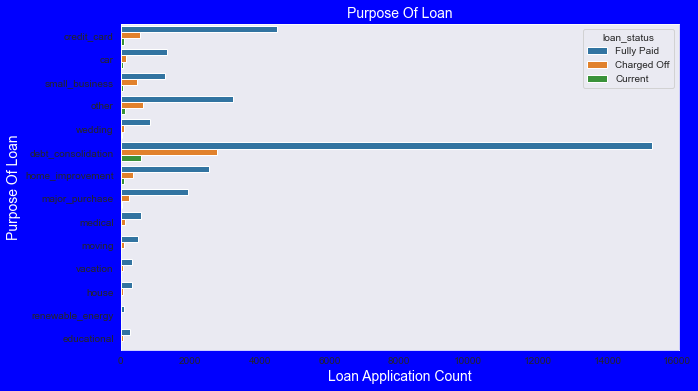

In [24]:
# Plot for Purpose column - debt consolidation is the purpose in which charged off and current status loans count are low

plt.figure(figsize=(10,6),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

In [25]:
# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,2011,12


In [26]:
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

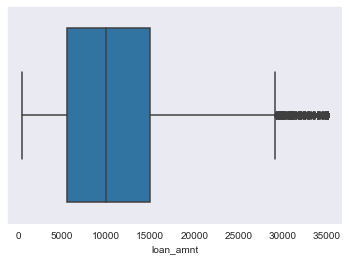

In [27]:
# Box plot on column Loan Amount 

sns.boxplot(loan.loan_amnt)
plt.show()

In [28]:
# Analysis on Total Payment

loan.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

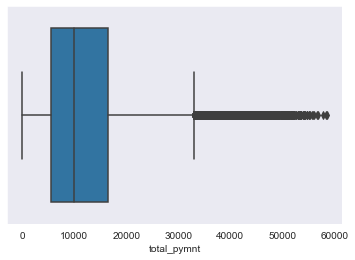

In [29]:
# Box plot on column total payment

sns.boxplot(loan.total_pymnt)

In [30]:
# Analysis on Annual income column

loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [31]:
# outlier at 0.99 quantile

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
loan["annual_inc"].describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

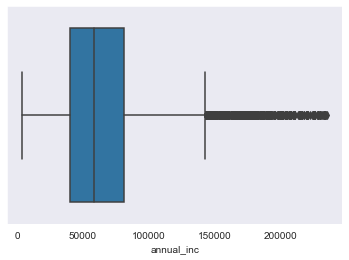

In [32]:
# Box plot on column annual income

sns.boxplot(loan.annual_inc)

In [33]:
# Analysis on column int_rate

loan['int_rate'].describe()

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

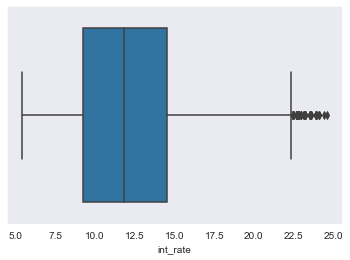

In [34]:
# Box plot on column interate rate

sns.boxplot(loan.int_rate)

In [35]:
# Remove columns like App type, Policy code, Initail Status, Installment and Payment Plan

columns_drop_list5 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
loan.drop(labels = columns_drop_list5, axis =1, inplace=True)
print(loan.shape)
loan.isnull().sum()

(39319, 42)


id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

In [36]:
# Create loan amounts into buckets bivariate findings

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

In [37]:
# Create annual incomes into buckets bivariate findings

loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [38]:
# Create intrest rates into buckets bivariate findings

loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

In [39]:
loan.shape

(39319, 45)

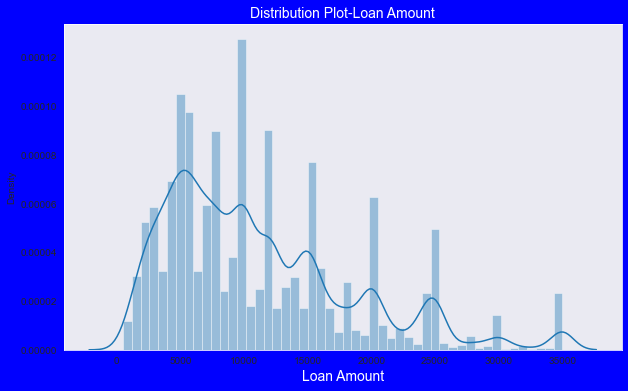

In [40]:
# Create Distribution Plot for Loan Amount

plt.figure(figsize=(10,6),facecolor='b')
sns.set_style("dark")
ax = sns.distplot(loan['loan_amnt'])
ax.set_title('Distribution Plot-Loan Amount',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
plt.show()

Text(0.5, 0, 'Funded Amount')

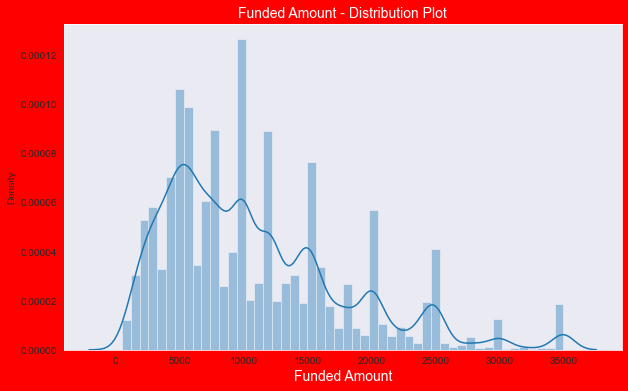

In [41]:
# Create Distribution Plot on Funded Amount
plt.figure(figsize=(10,6),facecolor='r')
sns.set_style("dark")
ax = sns.distplot(loan['funded_amnt'])
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

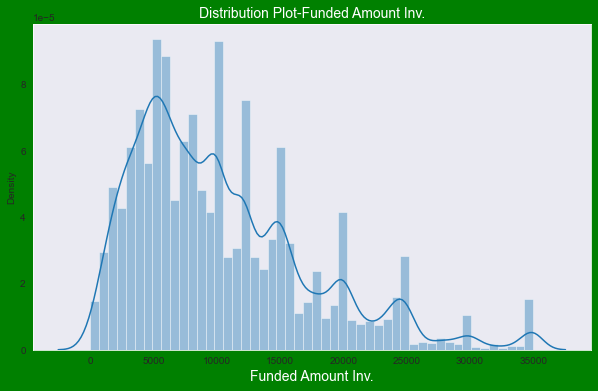

In [42]:
# Create Distribution Plot on Loan Amount

plt.figure(figsize=(10,6),facecolor='g')
sns.set_style("dark")
ax = sns.distplot(loan['funded_amnt_inv'])
ax.set_title('Distribution Plot-Funded Amount Inv.',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

In [43]:
# Loan Amount Funded Amount and Funded Aount_invert are more or less same pattern so considering Loan Amount for Analysis

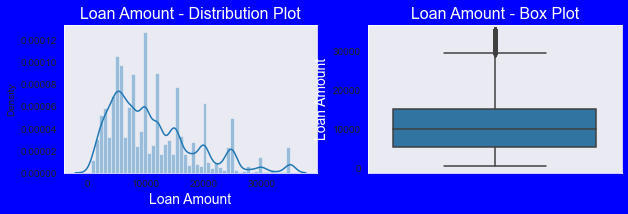

In [44]:
# Loan Amount Analysis - Ranges betwen 5k-15k

plt.figure(figsize=(10,6),facecolor='b')
sns.set_style("dark")
# Distribution_plot
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'])
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# Box_plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

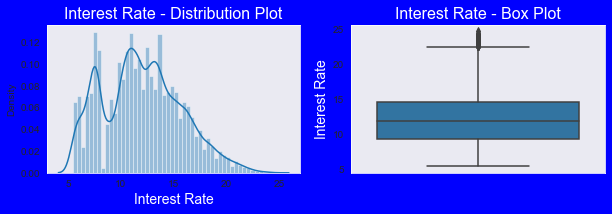

In [45]:
# Intrest Rate- ranges between 5% - 15%

plt.figure(figsize=(10,6),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'])
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()


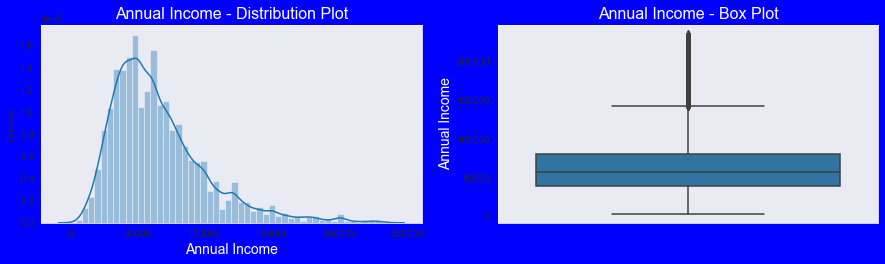

In [46]:
# Annual Income - ranges between 40k -80k 

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'])
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

In [47]:
# Loan Status agianst few Group analysis to analyze CHARGED OFF status

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1080,362,8531,9973,0.108292


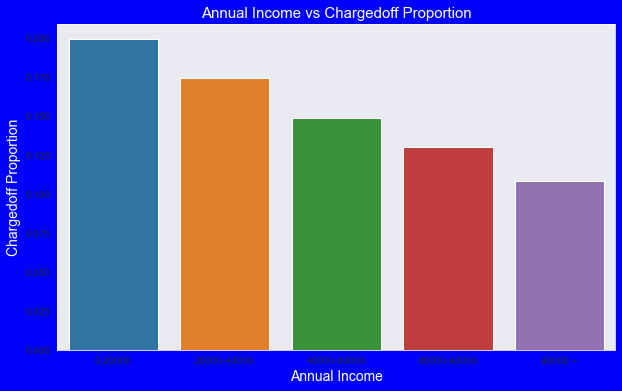

In [48]:
# Create Bar Plot for the Charged OFF data with respect to Annual Income Category 

fig, ax1 = plt.subplots(figsize=(10,6),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

In [49]:
# Purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.0,74.0,1251.0,1797.0,0.262660
10,renewable_energy,19.0,1.0,81.0,101.0,0.188119
3,educational,55.0,0.0,268.0,323.0,0.170279
9,other,629.0,126.0,3203.0,3958.0,0.158919
8,moving,91.0,7.0,479.0,577.0,0.157712
5,house,58.0,14.0,299.0,371.0,0.156334
7,medical,106.0,12.0,568.0,686.0,0.154519
2,debt_consolidation,2752.0,580.0,15165.0,18497.0,0.148781
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,338.0,97.0,2459.0,2894.0,0.116793


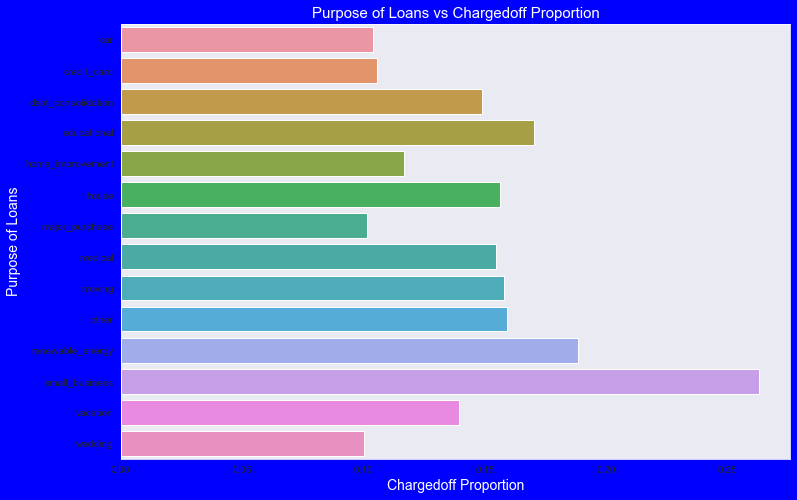

In [50]:
# Create Bar Plot for the Charged OFF data wirh respect to Purpose of Loan 

plt.figure(figsize=(12,8),facecolor='b')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [51]:
# Grade against Chargedoff_Proportion.

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False) 

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,190,306,0.323529
5,F,312,71,642,1025,0.304390
4,E,704,176,1906,2786,0.252692
3,D,1112,216,3916,5244,0.212052
2,C,1342,262,6411,8015,0.167436
1,B,1414,344,10167,11925,0.118574
0,A,601,40,9377,10018,0.059992


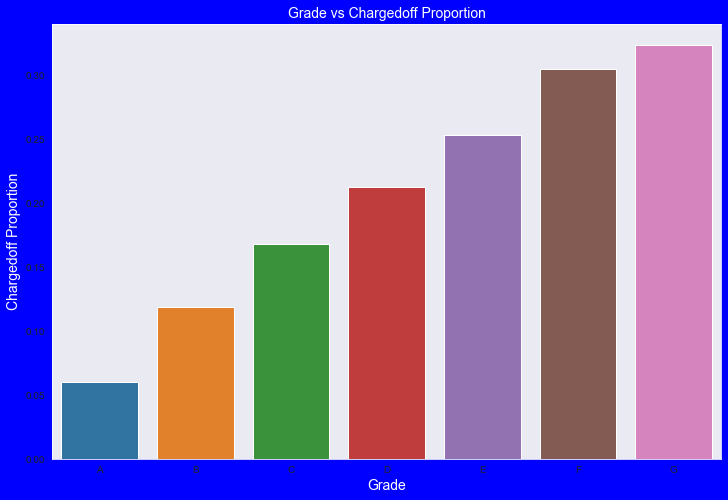

In [52]:
# Create Bar Plot for the Charged OFF data wirh respect to Grade column

plt.figure(figsize=(12,8),facecolor='b')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_title('Grade vs Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Grade',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [53]:
interest_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1250,351,3317,4918,0.254168
2,12.5-16,1995,329,9354,11678,0.170834
1,10-13,1224,269,8083,9576,0.127820
0,0-10,825,77,11403,12305,0.067046


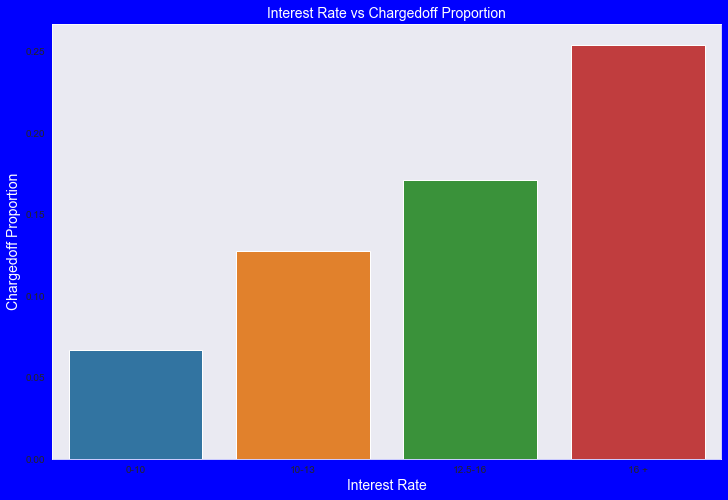

In [54]:
plt.figure(figsize=(12,8),facecolor='b')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

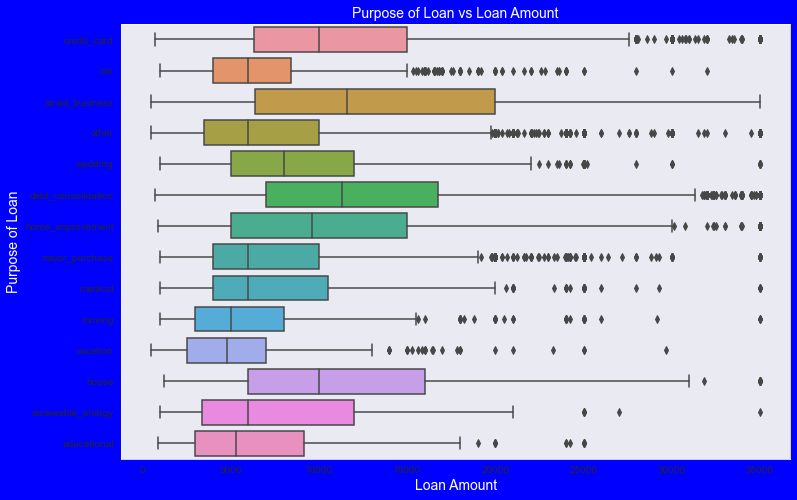

In [55]:
# Puprose of loan vs Loan amount - Box Plot - 

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=14,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

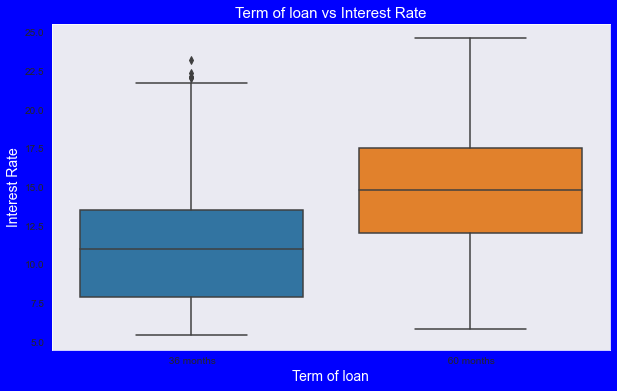

In [56]:
# Term of loan vs Interest Rate - Box Plot - HIgher Rate for longer period

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loan)
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

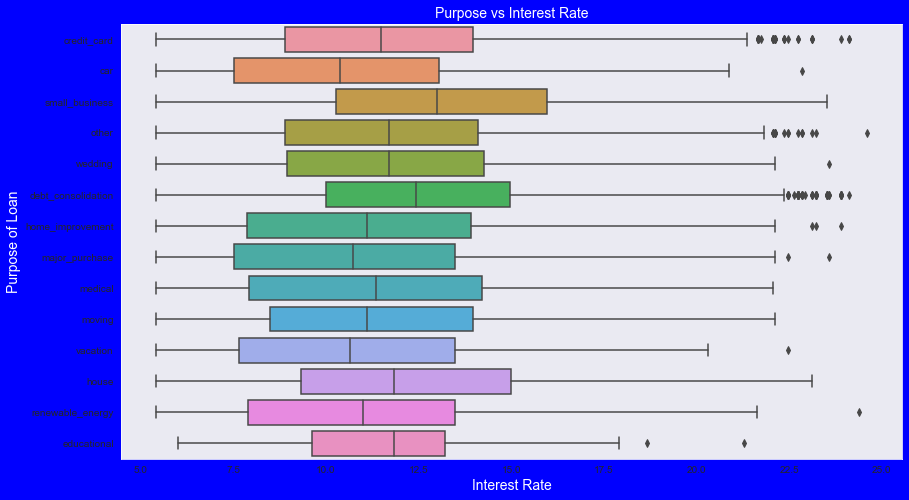

In [57]:
# Purpose vs Interest Rate - Box Plot - small business purposes with higher rate of interest to repay 

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan)
ax.set_title('Purpose vs Interest Rate',fontsize=14,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

Text(0.5, 0, 'Loan Amount')

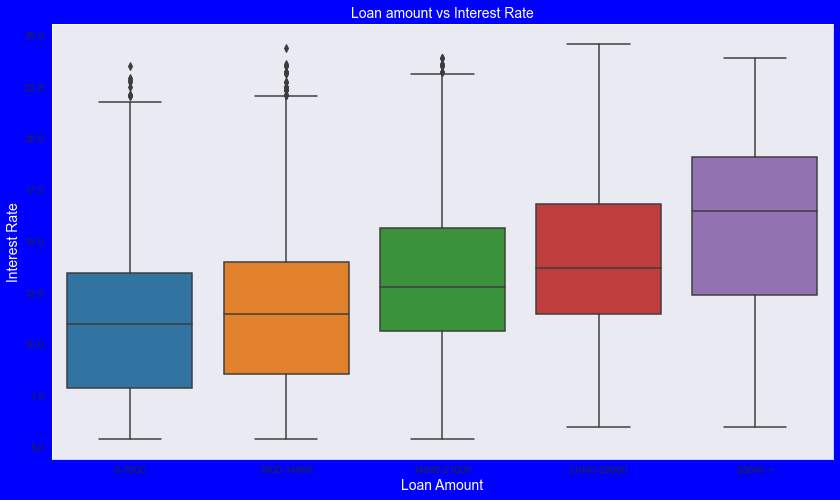

In [58]:
# Loan Amount vs Interest Rate - Box Plot - Interest Increase with Loan Amount

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan)
ax.set_title('Loan amount vs Interest Rate',fontsize=14,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')

In [59]:
# Choose few columns from dataset to cretae copy of the dataset

loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

,loan_amnt,annual_inc,year,int_rate,loan_status
0,5000,24000.0,2011,10.65,Fully Paid
1,2500,30000.0,2011,15.27,Charged Off
2,2400,12252.0,2011,15.96,Fully Paid
3,10000,49200.0,2011,13.49,Fully Paid
4,3000,80000.0,2011,12.69,Current
